In [1]:
from model.MNIST_multiclass_SLP import load_MulticlassSLP

model = load_MulticlassSLP('./param/MNIST_multiclass_SLP.pth')

/home/henry/Desktop/USAAIO/inference/model/MNIST_multiclass_SLP.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=de

In [2]:
from sklearn.datasets import fetch_openml
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

mnist = fetch_openml('mnist_784', as_frame=False)
X_np = mnist.data.astype('float32') / 255.0
y_np = mnist.target.astype(int)

X = torch.from_numpy(X_np).to(device)
y = torch.from_numpy(y_np).to(device)

split = int(len(X) * 6 / 7)
test_X, test_y = X[split:], y[split:]

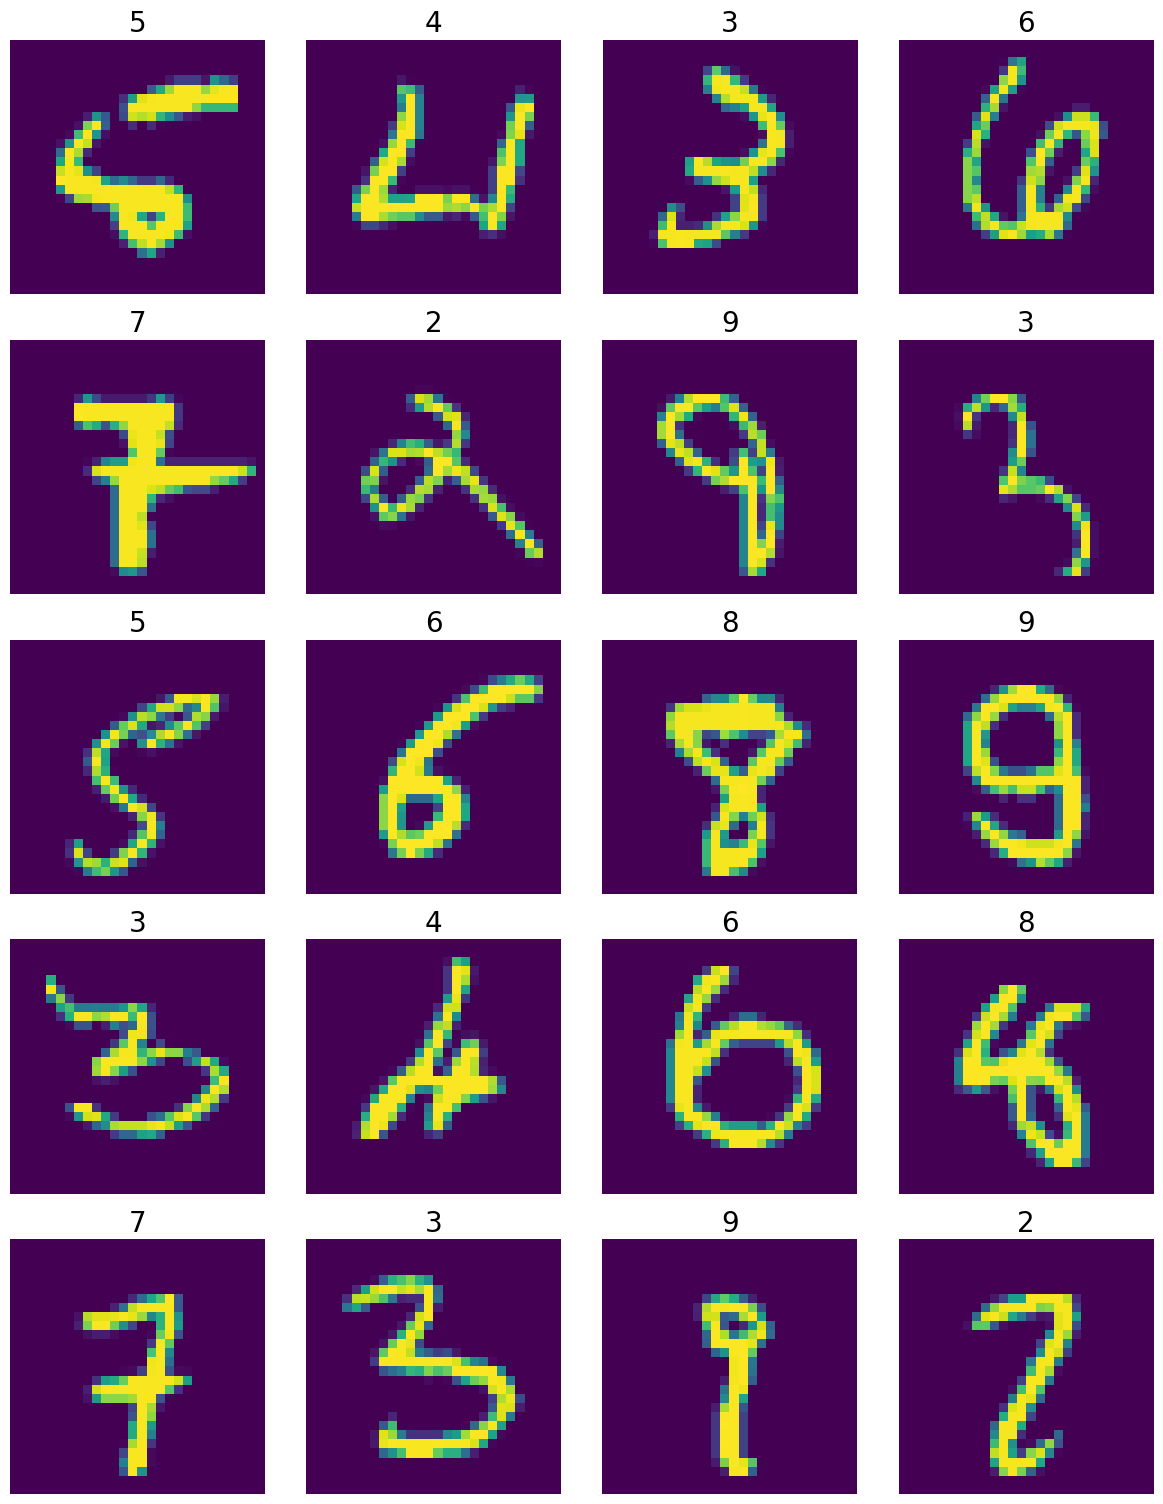

Number of wrong predictions: 753


: 

In [ ]:
wrong_ind = []

with torch.no_grad():
    preds = model(test_X)
    for i in range(len(test_X)):
        if preds[i].item() != test_y[i].item():
            wrong_ind.append(i)

import matplotlib.pyplot as plt

cols = 4
rows = (len(wrong_ind) + cols - 1) // cols
plt.figure(figsize=(cols * 3, rows * 3))

for i, idx in enumerate(wrong_ind[:20]):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_X[idx].view(28, 28).cpu())
    plt.axis('off')
    plt.title(int(test_y[idx].item()), fontsize=20)

plt.tight_layout()
plt.show()

print(f'Number of wrong predictions: {len(wrong_ind)}')


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = test_y.cpu().numpy()
y_pred = preds.cpu().numpy()

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

Accuracy:  0.9247
Precision: 0.9238
Recall:    0.9237
F1-score:  0.9236
